# Tarefa 2 - Feature Engineering

Para a segunda parte da atividade, considere o seguinte contexto: a partir do dataset flights já pré-processado, um cientista de dados gostaria de prever o tempo de atraso de partida e/ou chegada dos voos. Para isso, serão manipulada as features já fornecidas em dt flights e no novo dataset airports.csv, que contém os dados dos aeroportos nos Estados Unidos. Siga os passos a seguir:

**IMPORTANTE:** Salve o dataset flights.csv da tarefa passada depois de executar o pré-processamento, vocês vão precisar dele aqui.

### Importe as Bibliotecas necessárias

In [ ]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import radians, sin, cos,sqrt,atan2

### De upload do dataset flights.csv

In [ ]:
df = pd.read_csv("Notebook_PreProcessamento_resposta.csv",delimiter=",")

## Trabalhando com o atributo "Date".
 Extraia o dia da semana de partida dos voos a partir do atributo "Date" e guarde esse valor em uma coluna denominada "Weekday".

  

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])

df['Weekday']=df['Date'].dt.day_name()
df.head()


,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Weekday,Mes
0,2024-10-11,10:25,ATL Airport,SEA Airport,35.0,45.0,High,19,Friday,10
1,2024-01-20,18:38,IAH Airport,AUS Airport,3.0,25.0,Low,6,Saturday,1
2,2024-12-26,12:50,STL Airport,SEA Airport,20.0,48.0,Medium,6,Thursday,12
3,2024-08-19,07:28,MCO Airport,LAS Airport,33.0,48.0,High,18,Monday,8
4,2024-12-07,07:10,LAX Airport,SEA Airport,28.0,34.0,Low,20,Saturday,12


Crie uma coluna com o mês de partida dos voos a partir do atributo "Date".

In [ ]:
#df['Date']=pd.to_datetime(df['Date'])

df['Mes']=df['Date'].dt.month
df.head()


,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Weekday,Mes
0,2024-10-11,10:25,ATL Airport,SEA Airport,35.0,45.0,High,19,Friday,10
1,2024-01-20,18:38,IAH Airport,AUS Airport,3.0,25.0,Low,6,Saturday,1
2,2024-12-26,12:50,STL Airport,SEA Airport,20.0,48.0,Medium,6,Thursday,12
3,2024-08-19,07:28,MCO Airport,LAS Airport,33.0,48.0,High,18,Monday,8
4,2024-12-07,07:10,LAX Airport,SEA Airport,28.0,34.0,Low,20,Saturday,12


## Trabalhando com os atributos "Departure_Airport" e "Arrival_Airport".

A partir do dataset original, flights.csv, calculem a distância em kilômetros entre os aeroportos de partida e de chegada. Utilize o dataset adicional: airports.csv, que contém os dados dos aeroportos nos Estados Unidos:
  - Code
  - Airport
  - State
  - Country
  - Latitude
  - Longitude

Vocês irão precisar da seguinte função para calcular as distâncias entre os aeroportos, a partir de suas coordenadas de latitude (lat) e longitude(lon):



```
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em quilômetros
    
    # Converte coordenadas de graus para radianos
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Diferença das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Fórmula de Haversine
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    # Distância em quilômetros
    distance = R * c
    return distance
```



### Importe o dataset airports.csv:

In [ ]:
df_aeroporto = pd.read_csv("airports_v1-Parte2.csv",delimiter=",")
df_aeroporto.head()

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Code
0,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,ABE Airport
1,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,ABI Airport
2,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,ABQ Airport
3,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,ABR Airport
4,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,ABY Airport


### Aplique a fóruma de Haversine e crie a coluna "Distance" com as distâncias entre os aeroportos de partida e chegada.

Dica: Crie um dataset a partir da agregação do df flights e o df airports, obtendo as colunas: coordenadas latitudinais de partida, coordenadas latitudinais de chegada, coordenadas longitudinais de partida e coordenadas longitudinais de chegada.

In [ ]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em quilômetros

    # Converte coordenadas de graus para radianos
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Diferença das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))

    # Distância em quilômetros
    distance = R * c
    return distance

def apply_haversine(linha):
  distance= haversine_distance(linha.LATITUDE_departure,linha.LONGITUDE_departure,linha.LATITUDE_arrival,linha.LONGITUDE_arrival)
  return distance

df_agregado = df.merge(df_aeroporto, left_on='Departure_Airport', right_on='Code', how='left', suffixes=('_departure', '_arrival'))
df_agregado2 = df_agregado.merge(df_aeroporto, left_on='Arrival_Airport', right_on='Code', how='left', suffixes=('_departure', '_arrival'))

df_agregado2['Distance'] =df_agregado2.apply(apply_haversine,axis=1)

df_agregado2.head()



,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Weekday,Mes,...,LONGITUDE_departure,Code_departure,AIRPORT_arrival,CITY_arrival,STATE_arrival,COUNTRY_arrival,LATITUDE_arrival,LONGITUDE_arrival,Code_arrival,Distance
0,2024-10-11,10:25,ATL Airport,SEA Airport,35.0,45.0,3,19,Friday,10,...,-84.42694,ATL Airport,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,SEA Airport,3504.832199
1,2024-01-20,18:38,IAH Airport,AUS Airport,3.0,25.0,1,6,Saturday,1,...,-95.33972,IAH Airport,Austin-Bergstrom International Airport,Austin,TX,USA,30.19453,-97.66987,AUS Airport,225.445714
2,2024-12-26,12:50,STL Airport,SEA Airport,20.0,48.0,2,6,Thursday,12,...,-90.35999,STL Airport,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,SEA Airport,2745.169510
3,2024-08-19,07:28,MCO Airport,LAS Airport,33.0,48.0,3,18,Monday,8,...,-81.31603,MCO Airport,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,LAS Airport,3275.518732
4,2024-12-07,07:10,LAX Airport,SEA Airport,28.0,34.0,1,20,Saturday,12,...,-118.40807,LAX Airport,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,SEA Airport,1536.907415


### Agora, considerando o contexto de previsão do tempo de atraso de partida e/ou de chegada, avalie os atributos obtidos no dataset final.

Há redundância entre os atributos? Algum atributo deve ser retirado? Explique.

Dica: Verifique a relação entre os atributos, através de gráficos de dispersão e/ou gráficos de correlação.

Dica 2: transforme a variável "Turbulence level" em númerica para incluí-la no gráfico.

<ipython-input-51-54262c581c9d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


<Axes: xlabel='Arrival_Airport', ylabel='Code_arrival'>

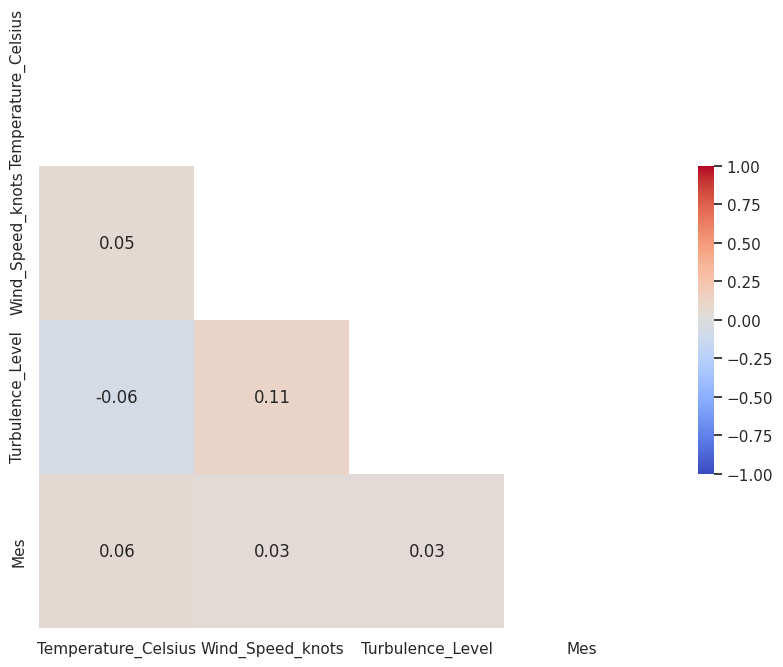

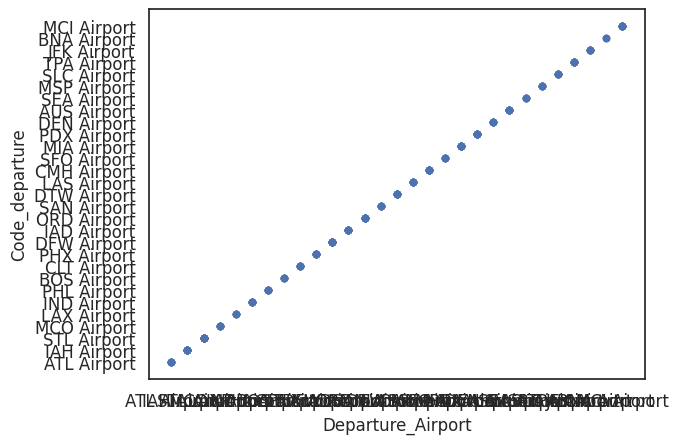

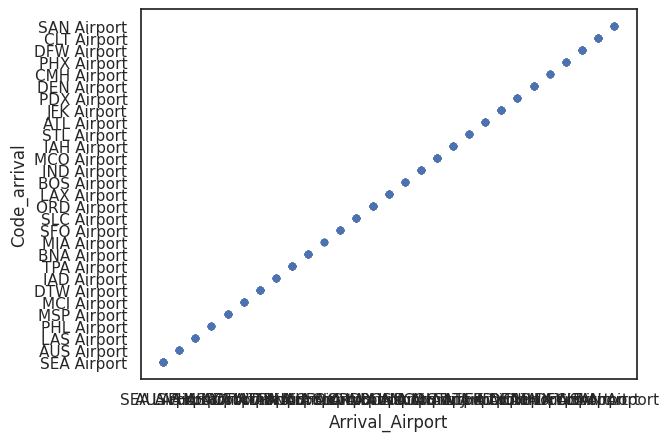

In [51]:
mapeando_turbulencia = {'Low': 1,'Medium': 2,'High': 3}
df['Turbulence_Level'] = df['Turbulence_Level'].replace(mapeando_turbulencia)

correlacao = df.corr()
sns.set(style="white")
mask = np.triu(np.ones_like(correlacao, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, cbar_kws={"shrink": .5})

df_agregado2.plot.scatter(x='Departure_Airport',y='Code_departure',fontsize = 12)
df_agregado2.plot.scatter(x='Arrival_Airport',y='Code_arrival')

Resposta: Sim, há redundância de atributos. Isso ocorre, pois ao mergir os dois datasets, juntamos colunas com nomes diferentes, mas com as mesmas informações, dados. Os exemplos são as colunas Departure_Airport com a Code_departure, e Arrival_Airport com Code_arrival. Dessa forma, podemos retirar Code_departure e Code_arrival.

Quais outros atributos seriam interessantes de serem adicionados? Crie pelo menos um novo atributo e explique sua importância.

Um atributo interessante de ser adicionado é a duração do voo. Isso, pois é uma informação relevante para os passageiros se organizarem em relação ao horário que irão chegar em seu destino, podendo reservar o check-in da hospedagem dependendo da duração do voo.

In [52]:
#estimativa de velocidade média de um voo comercial
velocidadeMedia_voo = 850 #km/h
df_agregado2['Duracao_Voo_minutos'] = df_agregado2['Distance'] / velocidadeMedia_voo * 60   #(km/min)

df_agregado2.head()

,Date,Time,Departure_Airport,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km,Weekday,Mes,...,Code_departure,AIRPORT_arrival,CITY_arrival,STATE_arrival,COUNTRY_arrival,LATITUDE_arrival,LONGITUDE_arrival,Code_arrival,Distance,Duracao_Voo_minutos
0,2024-10-11,10:25,ATL Airport,SEA Airport,35.0,45.0,High,19,Friday,10,...,ATL Airport,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,SEA Airport,3504.832199,247.399920
1,2024-01-20,18:38,IAH Airport,AUS Airport,3.0,25.0,Low,6,Saturday,1,...,IAH Airport,Austin-Bergstrom International Airport,Austin,TX,USA,30.19453,-97.66987,AUS Airport,225.445714,15.913815
2,2024-12-26,12:50,STL Airport,SEA Airport,20.0,48.0,Medium,6,Thursday,12,...,STL Airport,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,SEA Airport,2745.169510,193.776671
3,2024-08-19,07:28,MCO Airport,LAS Airport,33.0,48.0,High,18,Monday,8,...,MCO Airport,McCarran International Airport,Las Vegas,NV,USA,36.08036,-115.15233,LAS Airport,3275.518732,231.213087
4,2024-12-07,07:10,LAX Airport,SEA Airport,28.0,34.0,Low,20,Saturday,12,...,LAX Airport,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,SEA Airport,1536.907415,108.487582
